<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/Xor2_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

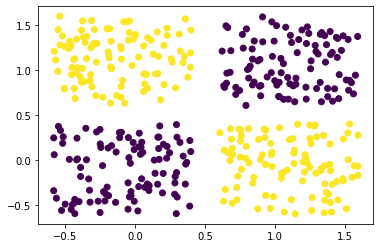

In [2]:
#generate xor like random data
# number of samples of each class
k = 100
# define 4 clusters of input data
q = 0.6 # offset of classes
x = np.random.rand(4*k,2)
y=np.zeros((4*k,1))
x[0:100,0]  , x[0:100,1],   y[0:100]  = x[0:100,0]  + q, x[0:100,1]    +q,0
x[100:200,0], x[100:200,1], y[100:200]= x[100:200,0]- q, x[100:200,1]  +q,1
x[200:300,0], x[200:300,1], y[200:300]= x[200:300,0]- q, x[200:300,1]  -q,0
x[300:400,0], x[300:400,1], y[300:400]= x[300:400,0]+ q, x[300:400,1]  -q,1

plt.figure()
plt.scatter(x[:,0], x[:,1], c=y)
plt. show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
coefs [array([[ 21.50891095,  -7.10848449,  14.0088517 , -29.55206692,
        -19.51513721,  -7.47613783, -11.36219675,  24.43044179,
         13.72304291,   6.59206565],
       [-17.25884288, -11.21028346,   5.23897715, -43.10378461,
          6.30791644,  13.52391819,  35.2082523 , -10.46700946,
        -19.03911297,  11.80282399]]), array([[ -1.18683721],
       [ 16.19119358],
       [-15.05249098],
       [-20.75265769],
       [ 16.82608526],
       [-10.24986578],
       [-21.75915184],
       [-11.23282475],
       [ 28.87798183],
       [ 37.48094466]])]
bias [array([  6.00649813, -19.80881106,  18.38735876,  -7.81222641,
         2.35191817,   3.29945019,  -5.53912732,   1.28242831,
       -10.60354233,  -4.52346316]), array([10.12721542])]
50.0
Prediction error: 50.0


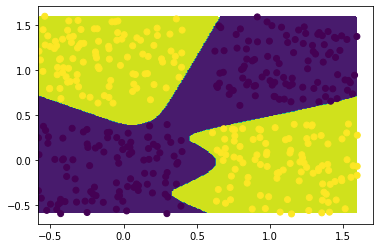

<Figure size 432x288 with 0 Axes>

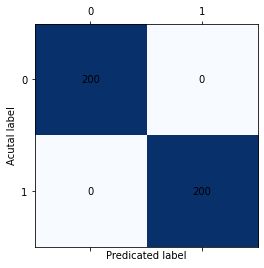

In [14]:
# Now use MLPClassifier to classifiy the data into two classes
model = MLPClassifier(activation='logistic',max_iter=10000,hidden_layer_sizes=(10,), solver='lbfgs')
model.fit(x, y)
y_pred = model.predict(x)
print(y_pred[0:10])
print ('coefs',model.coefs_)
print('bias',model.intercepts_)
#error = (y!=y_pred).mean() * 100
error = np.isclose(y, y_pred).mean()*100
print(error)
print ('Prediction error:', error)
# plot decision line
plt.figure()
x1 = np.arange (x[:,0].min(), x[:,1].max(), 0.01)
x1g, x2g=np.meshgrid(x1, x1)
yg=model.predict( np.array([x1g.flatten(), x2g.flatten()]).T) 
plt.contourf(x1g, x2g, yg.reshape(x1g.shape))
plt.scatter (x[:,0], x[:,1], c=y)
plt.show()
# confusion matrix
cm =confusion_matrix(y, y_pred)
plt.figure()
plt. matshow(cm, cmap=plt.cm.Blues)
for i in range(cm.shape[0]) :
  for j in range(cm.shape[1]) :
    plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
plt.xlabel ('Predicated label')
plt. ylabel('Acutal label')
plt. show()

(400, 1)
(400, 1)
(400, 1)
-- Epoch 1
Norm: 0.40, NNZs: 2, Bias: 0.000000, T: 400, Avg. loss: 0.016945
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.42, NNZs: 2, Bias: 0.000000, T: 800, Avg. loss: 0.015570
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.40, NNZs: 2, Bias: 0.100000, T: 1200, Avg. loss: 0.017326
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.40, NNZs: 2, Bias: 0.000000, T: 1600, Avg. loss: 0.016765
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.38, NNZs: 2, Bias: -0.100000, T: 2000, Avg. loss: 0.017285
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.47, NNZs: 2, Bias: 0.000000, T: 2400, Avg. loss: 0.017227
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.37, NNZs: 2, Bias: 0.100000, T: 2800, Avg. loss: 0.017153
Total training time: 0.01 seconds.
Convergence after 7 epochs took 0.01 seconds
[[ 0.24946306 -0.27083421]]
[0.1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


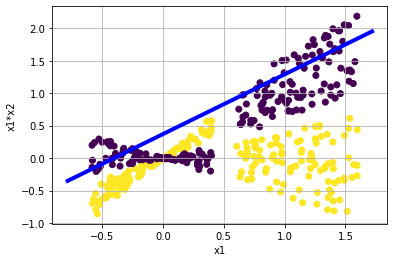

In [16]:
from sklearn.linear_model import Perceptron
model = Perceptron(eta0=0.1, max_iter=100, random_state=42, tol=0.001, verbose=1)
x1=x[:,0].reshape((-1,1))
x2=x[:,1].reshape((-1,1))
x3=x1*x2
X=np.hstack((x1,x3))
print(x1.shape)
print(x2.shape)
print(x3.shape)
model.fit(X,y)
print(model.coef_)
print (model.intercept_)
# plot decision line
plt. figure()
plt.scatter(x1,x3, c=y)
xx = np.arange(x1.min()-0.2, x1.max ()+0.2, 0.1)
yy =-(model.coef_[0,0]*xx+model.intercept_)/model.coef_[0,1]

plt.plot(xx,yy,'b-', linewidth=4)
plt.xlabel('x1')
plt.ylabel('x1*x2')
plt.grid()
plt.show()